This Notebook Corresponds with the VAIL Day 17 Activity

In [1]:
#making imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Network import Network
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#reading our house price data csv into a dataframe
house_info_df = pd.read_csv('housepricedata.csv')

In [3]:
#creating dataframe of the Y Data
Y_data = house_info_df['AboveMedianPrice']

#make a temp dataframe to hold X values
X_data = house_info_df.iloc[:, 0:10]

#standardizing values in X_Data dataframe
X_data_normalized = (X_data-X_data.mean())/X_data.std()

#converting x/y dataframes into np arrays for model to processs
x_data =  X_data_normalized.to_numpy()
y_data = Y_data.to_numpy().reshape(Y_data.to_numpy().shape[0],-1)

#parsing 70% train and 30% test
parse_index = round(x_data.shape[0]*0.7)

x_train , x_test = x_data[0:parse_index,:], x_data[parse_index:,:]
y_train , y_test = y_data[0:parse_index,:], y_data[parse_index:,:]

Epoch #: 1 | Latest Error" 2.664818812077537e-11
Epoch #: 2 | Latest Error" 0.9244187084198996
Epoch #: 3 | Latest Error" 0.9999236781157772
Epoch #: 4 | Latest Error" 0.003037716116553449
Epoch #: 5 | Latest Error" 2.016412438627691e-06
Epoch #: 6 | Latest Error" 1.1352752066057628e-10
Epoch #: 7 | Latest Error" 5.4499802106030165e-09
Epoch #: 8 | Latest Error" 3.887465418634573e-05
Epoch #: 9 | Latest Error" 0.0018064375458969456
Epoch #: 10 | Latest Error" 0.003940587378861618
Epoch #: 11 | Latest Error" 0.0018952358973404534
Epoch #: 12 | Latest Error" 0.00014345772245919706
Epoch #: 13 | Latest Error" 1.408209831427984e-13
Epoch #: 14 | Latest Error" 0.00027104093446450275
Epoch #: 15 | Latest Error" 3.30490548374431e-07
Epoch #: 16 | Latest Error" 3.7632820590635214e-21
Epoch #: 17 | Latest Error" 8.522467620872291e-11
Epoch #: 18 | Latest Error" 5.341632639740408e-13
Epoch #: 19 | Latest Error" 1.5102659632125674e-06
Epoch #: 20 | Latest Error" 0.39655097768899644
The Binary Cla

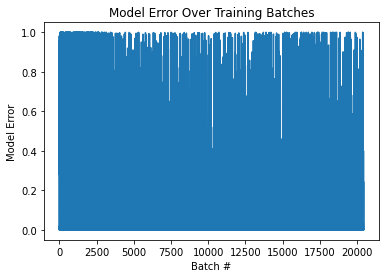

In [4]:
# creating the model

model = Network('mse', x_train, y_train, x_test, y_test, x_features=10, epoch_num=20,
                layer_num=3, layer_depths=[32, 32, 1], batch_num=round(x_train.shape[0]), learn_rate=0.1)

#adding layers
model.add_Layer('relu', 'initial_hidden')
model.add_Layer('relu', 'hidden')

# adding output layer
model.add_Layer('sigmoid', 'output')


# training model
model.train()

# plotting model error while training
model.plot_train_error()

# printing model predictions for some test samples
model.test_binary_classification()

### Notes
 * Log Loss Cost Function + Full Stochastic Gradient Descent + 70 Epochs + learn_rate=0.001 yielded ~90% accuracy
 * MSE Cost Function + Full Stochastic Gradient Descent + 20 Epochs + learn_rate=0.1 yielded ~90% accuracy

In [5]:
#testing homebrew model against a pre-build MLP Model from SKL

from keras.models import Sequential
from keras.layers import Dense

#reading data and parsing into test/train/validation

df = pd.read_csv('housepricedata.csv')

dataset = df.values

X = dataset[:,0:10]

Y = dataset[:,10]


min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.7)



model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

model.evaluate(x_test, y_test)[1]

Epoch 1/100
32/32 [==============================] - 1s 19ms/step - loss: 0.6915 - accuracy: 0.5236 - val_loss: 0.6824 - val_accuracy: 0.7099
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.7418 - val_loss: 0.6776 - val_accuracy: 0.6412
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6756 - val_loss: 0.6736 - val_accuracy: 0.6183
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6448 - val_loss: 0.6693 - val_accuracy: 0.5878
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6209 - val_loss: 0.6648 - val_accuracy: 0.5954
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6421 - val_loss: 0.

0.8173515796661377

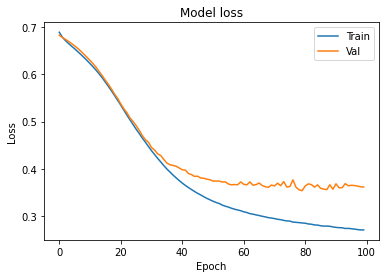

In [6]:
#plotting Error over Epochs
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Notes
 *SKL Model also reaches around 90% accuracy on this dataset.

Regularization Techniques (L1/L2/Neuron Dropout) help prevent a model from overfitting and failing to generalize
to unseen data. Overfitting can be seen if model accuracy on train/validation data diverges over epochs.
